<a href="https://colab.research.google.com/github/Mageswaran4363/FINE-GRAINED-SENTIMENT-ANALYSIS-ON-AMAZON-PRODUCT-REVIEWS/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import re

In [ ]:
# upload the csv file after running this code , copy the path from files and paste it in next pd.read_csv path.
from google.colab import files
uploaded = files.upload()

Saving test.xlsx to test.xlsx


In [ ]:
def word_extraction(sentence):  
   ignore = ['a', "the", "is" , "of", "and","are",'we','s','do','to','but','I', 'in','they','will','it']   
   words = re.sub("[^\w]", " ",  sentence).split() 
   cleaned_text = [w.lower() for w in words if w not in ignore]   
   return cleaned_text


In [ ]:
data = pd.read_csv('/content/test.csv')
data.head

<bound method NDFrame.head of                                           ReviewTitle  class
0                  Honest reviewof an edm music lover      1
1                             Really good and durable      1
2          Just awesome wireless headphone under 1000      1
3                          Loved the colour and sound      1
4    Battery life is good enoughto keep going all day      1
..                                                ...    ...
194                         Worst earphone of my life      0
195                             horrible battery life      0
196                                           Rubbish      0
197                            Insane value for money      0
198                              Sound and mic issues      0

[199 rows x 2 columns]>

In [ ]:
data.info()

#Populate X and y

X=data['ReviewTitle']
y=data['class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  199 non-null    object
 1   class        199 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
#Tokenization
dat=[]
for i in data['ReviewTitle']:
 ans = word_extraction(i)
 print(ans)
 dat.append(ans)
print(dat)

['honest', 'reviewof', 'an', 'edm', 'music', 'lover']
['really', 'good', 'durable']
['just', 'awesome', 'wireless', 'headphone', 'under', '1000']
['loved', 'colour', 'sound']
['battery', 'life', 'good', 'enoughto', 'keep', 'going', 'all', 'day']
['running', 'has', 'become', 'more', 'comfortable', 'now']
['extremely', 'good', 'bt', 'earphones', 'loud', 'super', 'bass']
['budget', 'friendly']
['satisfied', 'totally']
['awesome', 'bass', 'battery', 'life']
['good', 'sound', 'quality']
['amazing', 'product', 'just', 'go', 'for']
['no', 'second', 'thought', 'just', 'go', 'for']
['superb']
['a', 'good', 'multipoint', 'option', 'for', 'rs', '999']
['too', 'good', 'this', 'place', 'am', 'so', 'happy']
['best', 'quality', 'for', 'price']
['value', 'money']
['one', 'best', 'budget', 'sports', 'bluetooth', 'headphone']
['good', 'at', 'price']
['am', 'impressed', 'deep', 'bass', 'exactly', 'what', 'wanted']
['worth', 'buying', 'and', 'liked']
['comfortable', 'best', 'this', 'price', 'range']
['the

In [ ]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras

from tensorflow.python.keras.engine.sequential import Sequential

from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(dat)
print('Found %d unique words.' % len(tokenizer.word_index))
print(tokenizer.word_index)



Found 356 unique words.
{'product': 1, 'not': 2, 'good': 3, 'for': 4, 'quality': 5, 'earphone': 6, 'sound': 7, 'money': 8, 'price': 9, 'buy': 10, 'awesome': 11, 'battery': 12, 'best': 13, 'worth': 14, 'working': 15, 'one': 16, 'at': 17, 't': 18, 'just': 19, 'bass': 20, 'this': 21, 'value': 22, 'great': 23, 'bad': 24, 'really': 25, 'budget': 26, 'with': 27, 'you': 28, 'nice': 29, 'don': 30, 'worst': 31, 'all': 32, 'bluetooth': 33, 'buying': 34, 'purchase': 35, 'days': 36, 'very': 37, 'life': 38, 'so': 39, 'as': 40, 'stopped': 41, 'an': 42, 'music': 43, 'durable': 44, 'headphone': 45, 'amazing': 46, 'go': 47, 'a': 48, 'boat': 49, 'review': 50, 'highly': 51, 'recommand': 52, 'cheap': 53, 'baas': 54, 'month': 55, 'issues': 56, 'wireless': 57, '1000': 58, 'no': 59, 'superb': 60, 'too': 61, 'am': 62, 'what': 63, 'feeling': 64, 'connectivity': 65, 'the': 66, 'was': 67, 'get': 68, 'charging': 69, 'on': 70, 'read': 71, 'disappointment': 72, 'poor': 73, '1': 74, 'have': 75, 'noise': 76, 'cancell

In [ ]:
encoded_docs = tokenizer.texts_to_matrix(dat, mode='tfidf')
print(encoded_docs)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Padded Sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(100, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           3200      
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 19,851
Trainable params: 19,851
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(padded_sequence,y,validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
5/5 [==============================] - 1s 297ms/step - loss: 0.6658 - accuracy: 0.6226 - val_loss: 1.0053 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 1s 286ms/step - loss: 0.6685 - accuracy: 0.6226 - val_loss: 0.9610 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 1s 292ms/step - loss: 0.6621 - accuracy: 0.6226 - val_loss: 0.9450 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 1s 284ms/step - loss: 0.6653 - accuracy: 0.6226 - val_loss: 0.9366 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 1s 290ms/step - loss: 0.6653 - accuracy: 0.6226 - val_loss: 0.9512 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 1s 279ms/step - loss: 0.6676 - accuracy: 0.6226 - val_loss: 0.9482 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 1s 279ms/step - loss: 0.6557 - accuracy: 0.6226 - val_loss: 0.9703 - val_accuracy: 0.0

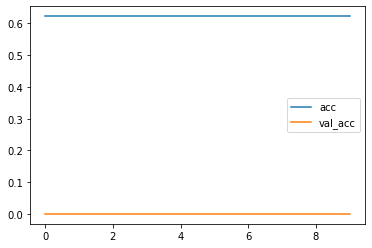

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot 1

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

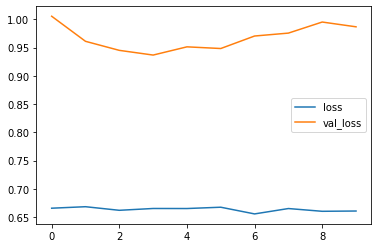

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot 2
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")


In [ ]:
#Sentiment PRediction

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", [prediction])


In [ ]:


test_sentence1 = "good"
predict_sentiment(test_sentence1)



1/1 [==============================] - 0s 44ms/step
Predicted label:  [1]
